In [35]:
import cv2
import matplotlib.pyplot as plt

In [36]:
file = 'dnn_model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
trained_model = 'dnn_model/frozen_inference_graph.pb'

In [37]:
model = cv2.dnn_DetectionModel(trained_model, file)

In [38]:
model.setInputSize(320, 320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001AACF688F90>

[18 18 17]     [0.7573684  0.7090619  0.67684394]


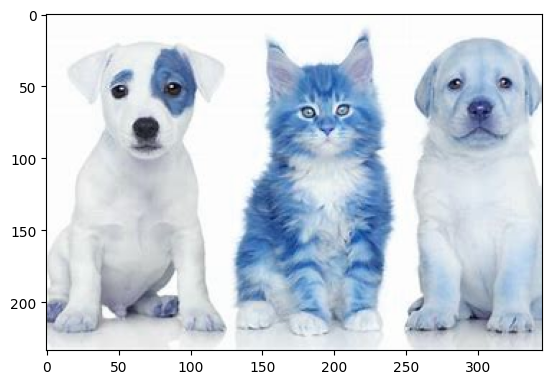

In [39]:
img = cv2.imread('images/image.png')
plt.imshow(img)
idx, conf, bbox = model.detect(img, confThreshold=0.6)
print(idx,'   ', conf)
boxs = bbox

True

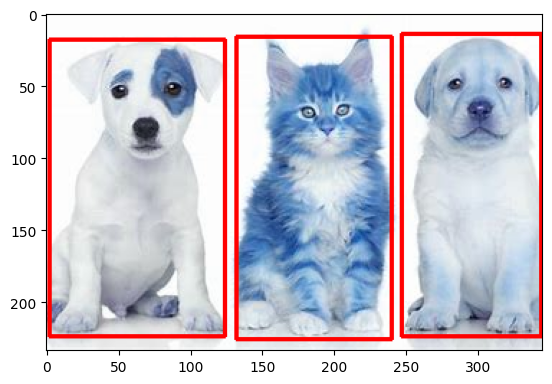

In [40]:
font = cv2.FONT_HERSHEY_PLAIN
for classes_idx, confidence, bboxs in zip(idx.flatten(), conf, bbox):
    cv2.rectangle(img, bboxs, (255, 0, 0), thickness=2)
    # cv2.putText(img, classes[classes_idx-2], (bboxs[0]+10, bboxs[1]+40), font, fontScale=2, color=(0,255,0), thickness=2)

plt.imshow(img)
cv2.imwrite('result.png', img)

In [48]:
pad = 15
for i in range(len(boxs)):
    x, y, w, h = boxs[i]
    
    crop_img = img[y:y+h, x:x+w]
    # crop_img = img[y-15:y+h+15, x-15:x+w+15]

    cv2.imshow('crop_img', crop_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # cv2.imwrite(f'croped/img{(i+1)}.png', crop_img)

    print(f'{x} {y} {w} {h}')

2 18 123 207
247 14 98 211
132 16 109 211


In [51]:
# 247 14 98 211
# 132 16 109 211
bbox = (2, 18, 123, 207)
pad = 10
x, y, w, h =  bbox

if can_crop(bbox, pad):
    print('cropped')
    crop_img = img[x-pad:x+h+pad, y-pad:y+w+pad]

else:
    print('not cropped')
    crop_img = img[y:y+h, x:x+w]

cv2.imshow('crop_img', crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cropped


In [34]:
def can_crop(bbox, pad):
    x, y, w, h =  bbox
    new_bbox = [x-pad, x+h+pad, y-pad, y+w+pad]

    flag = True
    for i in new_bbox:
        if i < 0:
            flag = False

    return flag